In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

In [89]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        `sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5`
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))

In [18]:
ref_df = pd.read_csv('../../data/dataset.csv')

AttributeError: 'DataFrame' object has no attribute 'datatypes'

In [13]:
print(len(pd.unique(ref_df["Player_id"])))
print(len(pd.unique(ref_df["Club_id"])))
print(sorted(list(pd.unique(ref_df.Season))))
print(sorted(list(pd.unique(ref_df.MarketValue))))

23635
4454
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[0, 10000, 12500, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 70000, 75000, 80000, 90000, 100000, 115000, 120000, 125000, 130000, 135000, 150000, 175000, 180000, 190000, 200000, 215000, 220000, 225000, 230000, 250000, 275000, 285000, 290000, 295000, 300000, 315000, 325000, 330000, 340000, 350000, 375000, 380000, 400000, 425000, 450000, 475000, 500000, 525000, 530000, 550000, 560000, 570000, 575000, 600000, 625000, 650000, 675000, 680000, 690000, 700000, 725000, 750000, 760000, 775000, 780000, 785000, 800000, 825000, 830000, 850000, 875000, 885000, 900000, 920000, 925000, 950000, 975000, 1000000, 1050000, 1075000, 1100000, 1150000, 1175000, 1200000, 1250000, 1300000, 1350000, 1375000, 1400000, 1425000, 1450000, 1500000, 1550000, 1600000, 1610000, 1625000, 1650000, 1700000, 1750000, 1800000, 1850000, 1875000, 1900000, 1950000, 2000000, 2050000, 2

In [20]:
df = pd.read_csv('../../data/dataset.csv')
df = df.sort_values(by=['Season', 'Player_id'])
categorical_features = ['Club_id', 'Competition', 'Liga', 'Liga_level', 'international']
df[categorical_features] = df[categorical_features].astype('category')
# and drop the name column (becasue it cant handle strings that are not categorical)

df = df.drop(columns=['name'])
df = df.query('MarketValue > 0.1')

In [21]:
# load model
model = CatBoostRegressor()
model.load_model('catboost_model_test22.cbm')


In [23]:
test = df[df['Season'] == 2022]
x_test = test.drop(['MarketValue'], axis=1)
y_test = test['MarketValue']
test = test.reset_index()
test_model = model.predict(x_test)
test_model = 10**test_model -1


def predictedMV(tm_id):
    player_idx = test.index[test['Player_id'] == tm_id].tolist()[0]
    return test_model[player_idx]

In [24]:
TM_id = 241641
print(f"""
Player: {TM_id}, MV: {df[]}, etstMV: {predictedMV(TM_id)}
""")


Player: 241641, MV: 57166       2500000
399        12000000
29284      16000000
92030      40000000
46732      50000000
46754     100000000
88004      80000000
88023      70000000
88044      80000000
128431     80000000
Name: MarketValue, dtype: int64, etstMV: 29235537.280030787



In [ ]:
# Find index
test.index[test['Player_id'] == 241641].tolist()[0]



test_model[4986]




In [91]:
df.head()

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played,Club_id,Competition,MarketValue,name,age,Days_injured,international,Liga,Liga_level,W,D,L,Points,Goales_scored,Goales_conceded
0,10,2004,45,1.60,17,11,4,0,0,0,110.0,3244,86,Bundesliga,12000000,Miroslav Klose,26.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
1,690,2004,41,1.80,19,14,5,0,0,0,136.0,3001,86,Bundesliga,7500000,Ivan Klasnic,24.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
2,4316,2004,35,1.74,1,0,2,0,0,0,478.0,2985,86,Bundesliga,4500000,Petri Pasanen,24.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
3,4403,2004,28,1.82,3,6,4,0,0,0,130.0,1898,86,Bundesliga,4000000,Daniel Jensen,25.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
4,10,2005,40,1.70,31,17,5,1,0,1,115.0,3313,86,Bundesliga,30000000,Miroslav Klose,27.0,0.0,1,Bundesliga,First Tier,21,7,6,70,79,37


In [93]:
# define categorical features
categorical_features = ['Club_id', 'Competition', 'Liga_level']
df[categorical_features] = df[categorical_features].astype('category')

# and drop the name column (becasue it cant handle strings that are not categorical)
df = df.drop(columns=['name', 'Liga', 'Yellow_cards', 'Red_cards', 'Yellow_red_cards', 'Penalty_goals', "Minutes_per_goal"])
df = df.query('MarketValue > 0.1')

df['Goals_per_90'] = df['Goals'] / (df['Minutes_played']/90)
df.head()

,Player_id,Season,Games,PPG,Goals,Assists,Minutes_played,Club_id,Competition,MarketValue,age,Days_injured,international,Liga_level,W,D,L,Points,Goales_scored,Goales_conceded,Goals_per_90
0,10,2004,45,1.60,17,11,3244,86,Bundesliga,12000000,26.0,0.0,1,First Tier,18,5,11,59,68,37,0.471640
1,690,2004,41,1.80,19,14,3001,86,Bundesliga,7500000,24.0,0.0,1,First Tier,18,5,11,59,68,37,0.569810
2,4316,2004,35,1.74,1,0,2985,86,Bundesliga,4500000,24.0,0.0,1,First Tier,18,5,11,59,68,37,0.030151
3,4403,2004,28,1.82,3,6,1898,86,Bundesliga,4000000,25.0,0.0,1,First Tier,18,5,11,59,68,37,0.142255
4,10,2005,40,1.70,31,17,3313,86,Bundesliga,30000000,27.0,0.0,1,First Tier,21,7,6,70,79,37,0.842137


In [94]:
# split data into train and test, train is every season before 2022
train = df[df['Season'] < 2022]
test = df[df['Season'] == 2022]

x_train = train.drop(['MarketValue'], axis=1)
y_train = train['MarketValue']
x_test = test.drop(['MarketValue'], axis=1)
y_test = test['MarketValue']
y_train = np.log10(y_train + 1)

In [95]:
model = CatBoostRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    thread_count=-1,
    max_depth=6,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=0.3,
    od_type="Iter"
)

In [96]:
model.fit(x_train, y_train, cat_features=categorical_features)

Text(0.5, 1.0, 'Feature Importance')

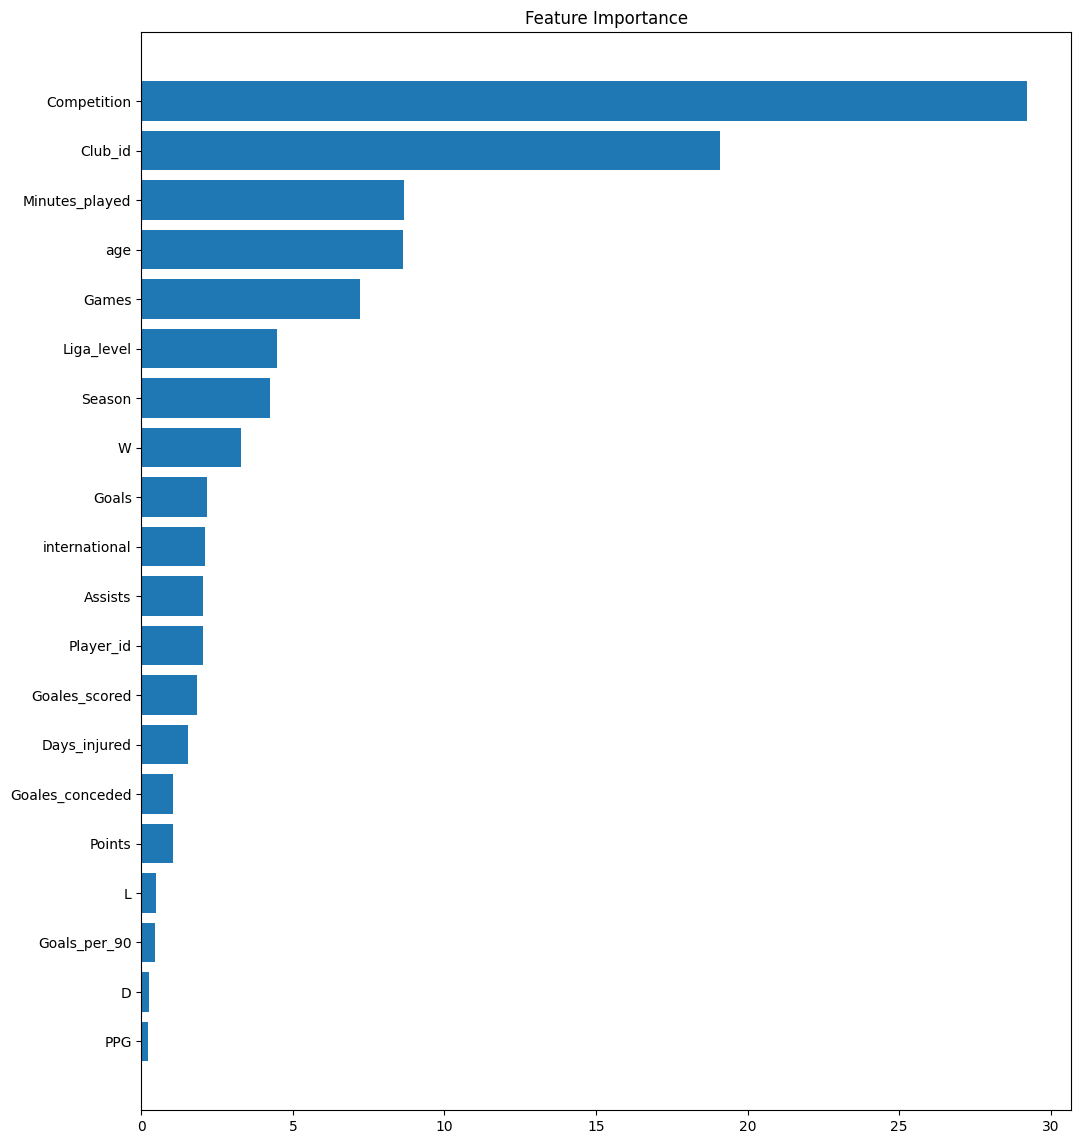

In [97]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 14))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train.drop(['MarketValue'], axis = 1).columns)[sorted_idx])
plt.title('Feature Importance')

In [98]:
pred = model.predict(x_test)
pred = 10**(pred) - 1
pred[pred < 0] = pred.mean()
cat_rmsle = round(rmsle(y_test, pred), 2)
print('Test RMSLE:', cat_rmsle)

Test RMSLE: 0.73
